# **Credit Card Customer Segmentation**

# **Business Problem**

**Numbers and Statistics**


*   The credit card industry is big business, and it is dominated by a handful of companies.

* American consumers collectively are flirting with $1 trillion in credit card debt in mid-2017, according to the Federal Reserve consumer credit report.1  The top four issuers provide more than 57 percent of all the cards issued by 5,231 banks. The top 10 issuers issued nearly 90 percent.13

*  There were some 14.5 billion U.S. general purpose credit card transactions in the first six months of 2015, accounting for more than $1.4 trillion in purchase volume.27 General purpose credit card spending has risen as a proportion of gross domestic 
product, rising from 10 percent of GDP in 2000 to 15 percent in 2014.2

*  The total number of credit card transactions in the U.S. was 26.2 billion in 2012, up from 21 billion in 2009,3 according to the 2013 Federal Reserve Payments Study. 

*  At the end of 2014, there were approximately 3.4 billion smart chip cards in circulation around the globe, per EMV Connection.22 Today, U.S. card issuers are in the midst of upgrading approximately 1.2 billion credit and debit cards to smart chip cards.25  Approximately 400 million chip cards were issued in the U.S. by the end of 2015.22

** The Problem **

Anyone searching on a credit card comparison website is already in the market for a new credit card and is actively searching for the best deal. These are either:

* Primary market consumers (first-time credit card applicants, often with no credit history)

* People who are dissatisfied with their current credit card and have made their minds up to switch, or

* People who have identified a strategic reason to add a second or third credit card to their arsenals.

**Market segmentation**

* With different motivations like those above, it's hard to know what consumers are thinking, but it does point to the importance of market segmentation. In other words, know which consumers are interested more in rewards and which are interested more in low prices - and give both segments what they want.

* To a great degree, this is already happening. Marketers are sophisticated enough to know what consumers they want - high-spending ones, of course - and are targeting them with the juiciest offers.

* The number one challenge faced by marketers is to understand who they are selling to. When you know your buyers’ personas you can tailor your targeting and offerings to increase their satisfaction and your revenue as a result. When you already have a pool of customers and enough data, it can be very useful to segment them.

# **Objective**

The data for this analysis was taken from Kaggle
Data Set : https://www.kaggle.com/arjunbhasin2013/ccdata



*   Create customer segmentation to help the credit card companies for Targeted Marketing
*   Come up with recommendations/ strategies to target different segments



# **Obtaining the Data**

In [0]:
#Importing necessary packages to do data manipulation and Exploratory data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from google.colab import drive, files
drive.mount('/content/drive/')
path = "/content/drive/My Drive/Customer_segmentation/CC_GENERAL.csv"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
df = pd.read_csv(path)

In [13]:
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [14]:
#Let us get more info on the columns and the number of entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

We see that there are 8950 entries, and 18 behavioral variables  in total, in which all are numerical and cust_id indicating the customer id who has owns the card

In [15]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Some Statistics**

*   We see that the purchases range from 0 dollars to 49000 dollars with mean of 1003 dollars
*   The credit limit ranges from as 50 dollars to a max of 30000 dollars,with a mean of 4494 dollars


*   The cash advance is the cash loan taken from your credit card account using an ATM, bank withdrawal or check from your card issuer. It has a mean of 978$ and max of 47137 dollars
*   the installment purchase amount ranges from 0 dollars to a max of 22500 dollars with a mean of about 411 dollars
*  the installment purchase frequency ranges from 0% to as high as 100% with a mean of about 49%. This implies that on an average users buy 50% of the products on installments and there are users that buy the items on installments 100% of the time
*   The balance ranges from 0 dollars to 19000 dollars with a mean of 1564 dollars.  Balance is the amount of money owed to the credit card company. Users owe 0 dollars to 19000 dollars to the credit card company with the average amount owed being 1564 dollars




In [16]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We see that the credit limit has 1 missing value and the minimum payments has about 313 missing values. Let us fill the missing data with the mean of the respective colums so that the distribution of the data does not change


In [0]:
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean(),inplace= True)
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean(),inplace= True)

In [18]:
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Now that there are no missing values, let us explore the data a bit**

**Let us try to select three samples out of the data set and try to analyse how they belong to different segments**

In [19]:

# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [5,75,342]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(df.loc[indices], columns = df.keys()).reset_index(drop = True)
print("Chosen samples of credit card customers dataset:")
display(samples)

Chosen samples of credit card customers dataset:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10006,1809.828751,1.0,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.0,12
1,C10079,5860.433624,1.0,561.87,249.50,312.37,0.000000,0.833333,0.166667,0.750000,0.000000,0,14,6000.0,1990.044998,2161.428274,0.0,12
2,C10353,1254.669100,1.0,361.73,361.73,0.00,198.686744,0.166667,0.166667,0.000000,0.083333,1,2,1500.0,535.606816,432.688080,0.0,12


The mean values of the predictors are as follows




# **Heat map of the variables **
## let us see if there are any predictors with high correlation



,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


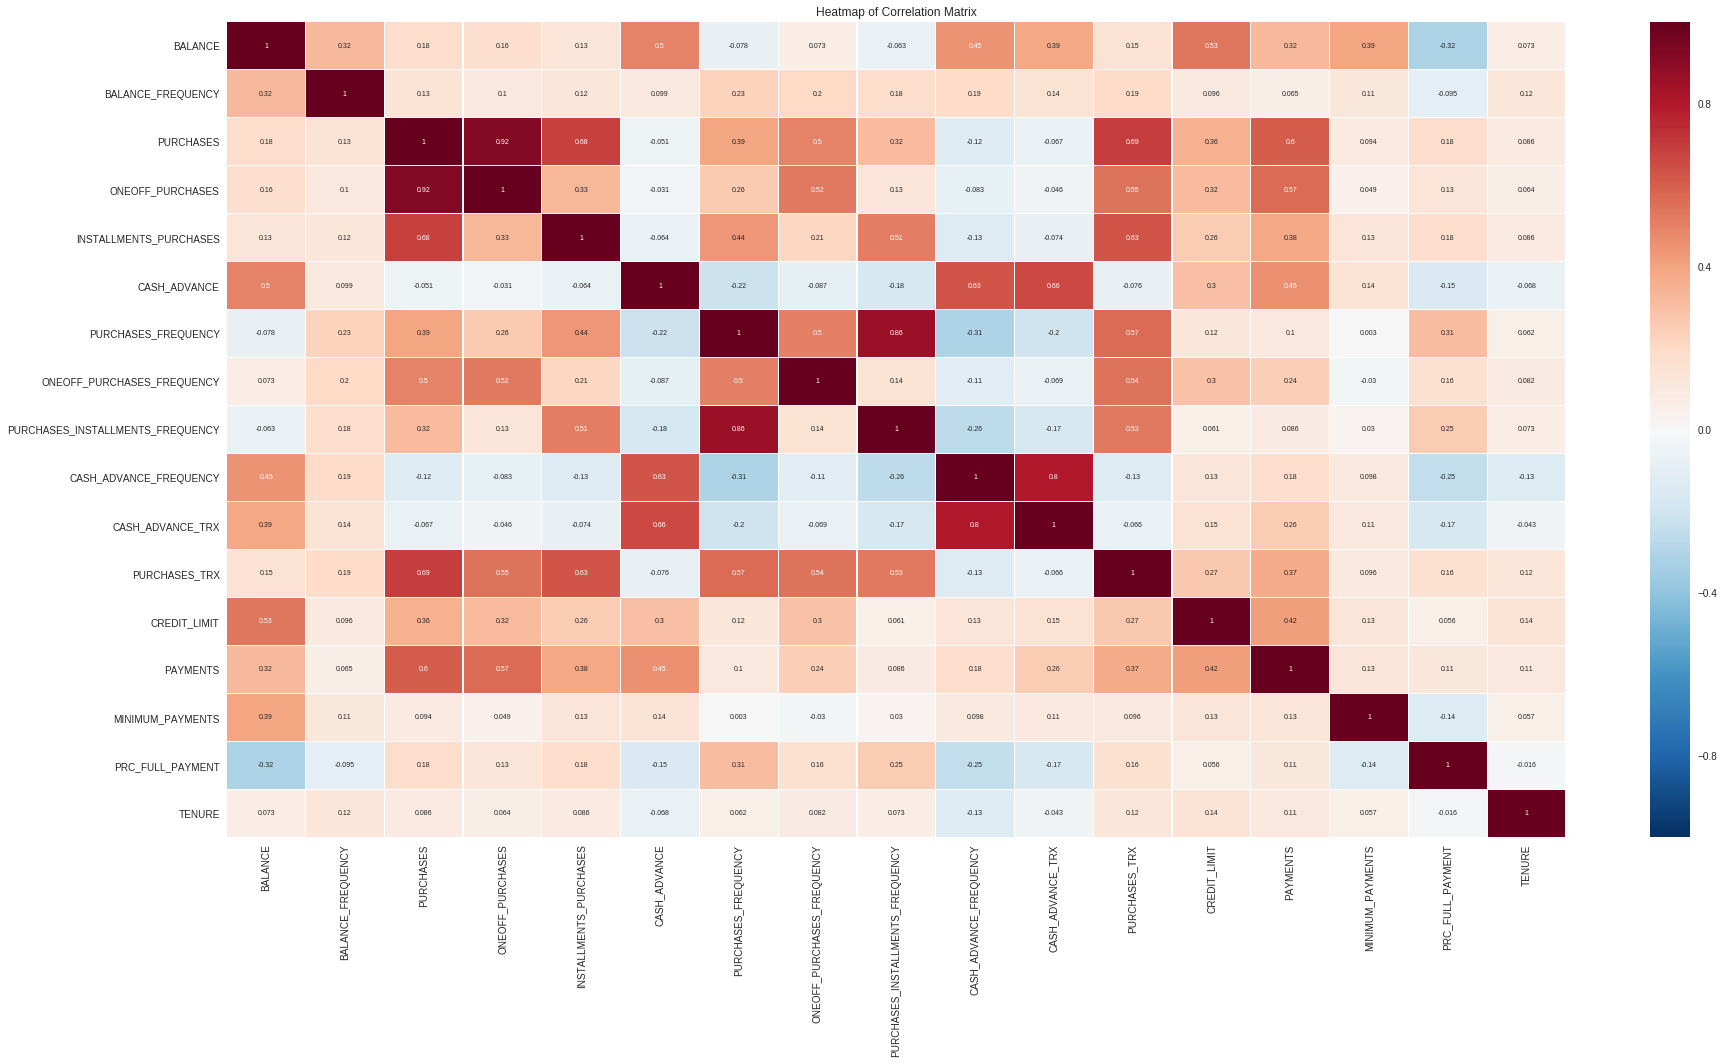

In [20]:
# Create a correlation matrix. What features correlate the most eachpther? 
corr = df.corr()
fig, ax = plt.subplots(figsize=(30,15))    
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=.2, 
            ax=ax,
            annot=True, 
            annot_kws={"size": 7})
plt.title('Heatmap of Correlation Matrix')
corr

We see that many variables have high correlation, let us try to get the pairs with high correlation from the below code

In [21]:
def get_pairs(df):
    '''Grabs the combinations of pairs of column names '''
    pairs = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs.add((cols[i], cols[j]))
    return pairs

def top_abs_corrs(df, n=.5):
    '''Returns the variables with absolute value of correlation >= n'''
    corrs = df.corr().abs().unstack()
    pairs = get_pairs(df)
    top_corrs = corrs.drop(labels=pairs).sort_values(ascending=False)
    top_corrs = top_corrs.to_dict()
    d= {k: v for k, v in top_corrs.items() if  v >= n}
#     return top_corrs[0:n]
    return d

# return pairs from the correlation matrix with correlation >= .85
top_corrs = top_abs_corrs(corr,.85)
top_corrs

{('CASH_ADVANCE', 'CASH_ADVANCE_FREQUENCY'): 0.9118370648288009,
 ('CASH_ADVANCE', 'CASH_ADVANCE_TRX'): 0.9170453786323367,
 ('CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX'): 0.9769561655289744,
 ('INSTALLMENTS_PURCHASES', 'PURCHASES_TRX'): 0.8603490822035166,
 ('PURCHASES', 'ONEOFF_PURCHASES'): 0.9535932980644026,
 ('PURCHASES', 'PURCHASES_TRX'): 0.8643451146665079,
 ('PURCHASES_FREQUENCY',
  'PURCHASES_INSTALLMENTS_FREQUENCY'): 0.9533728151834796}

We see the following


*   we see that Cash_Advance has high correlation of about 91% with cash_advance_frequency, cash_advance_trx...so it is safe to drop these two columns 
*   purchases has high correlation of 95% with oneoff_purchases, so it is good to drop oneoff_purchases

*   Purchase_frequence has high correlation of 95% with purchases_installments_frequency, so we are good to drop purchases_installments_frequency



*  PURCHASES_TRX has about 86% correlation with Purchasesm so lets go ahead and drop that as well







# **Outlier Detection using Isolation Forest**

**Return the anomaly score of each sample using the IsolationForest algorithm**

**The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.**

**Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.**

**This path length, averaged over a forest of such random trees, is a measure of normality and our decision function.**

**Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.**

**It gives a score of -1 for anomalies**

In [22]:
df_temp = df.drop('CUST_ID',axis=1)

#Let us see the how the data of each variable looks like using describe()
df_temp.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [30]:
from sklearn.ensemble import IsolationForest


# clf = IsolationForest(n_jobs=6,n_estimators=500, max_samples=256, random_state=23)
# fit the model
clf = IsolationForest(max_samples=100)
clf.fit(df_temp)
y_pred_train = clf.predict(df_temp)


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:213: FutureWarning: default contamination parameter 0.1 will change in version 0.22 to "auto". This will change the predict method behavior.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)


In [74]:
df_temp['not outlier'] = y_pred_train
df_temp.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,not outlier
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,1
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [0]:
df_clean = df_temp.drop(df_temp[df_temp['not outlier']==-1].index)
df_clean.drop('not outlier',axis=1, inplace= True)

In [33]:
df_clean.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [34]:
#df_clean has no outliers and its length is 8055 with 895 entries being removed from the original data set
len(df_clean)


8055

# **Visualising the Data Distribution**

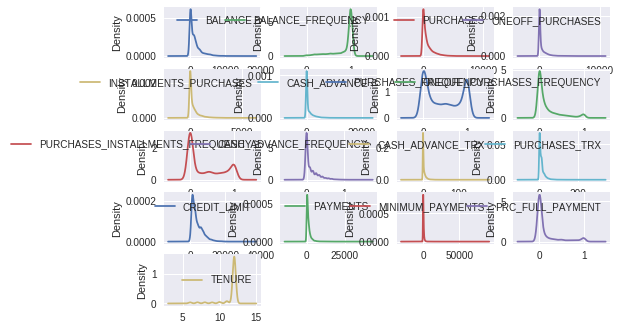

In [36]:
#Univariate Analysis
df_clean.plot(kind='density', subplots=True, layout=(5,4), sharex=False)
plt.show()


**We see that most of the data are skewed**

# **Feature Transformation**

**In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.**

## Pre-Req: Standardize the Dataset
### First, lets rescale our feature vectors

In [37]:
from sklearn.preprocessing import StandardScaler
scaled_df = StandardScaler().fit_transform(df_clean)
df_processed = pd.DataFrame(scaled_df,columns = df_clean.columns)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


## Choosing the Right Number of Dimensions

### The goal is to choose the right number of dimensions that captures the most variance. 

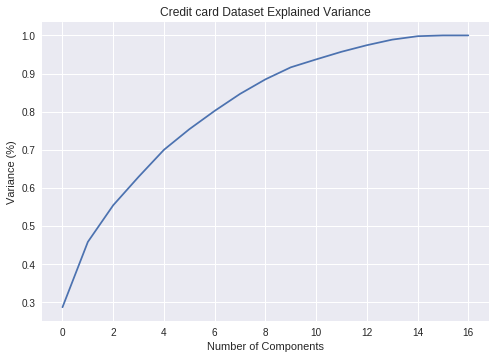

In [38]:
#Fitting the PCA algorithm with our Data
from sklearn.decomposition import PCA
pca = PCA().fit(df_processed)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Credit card Dataset Explained Variance')
plt.show()

we see that at components=7 we can explain about 85% of the variance.Let us chose the number of components as 7

In [0]:
# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
pca = PCA(n_components=8)
pcomponents = pca.fit_transform(scaled_df)
df_pca = pd.DataFrame(data = pcomponents, columns = ['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7','PC8'])


In [43]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.903492,-1.945454,0.372983,0.665525,0.095946,-0.579439,0.505254,-0.180630
1,3.062577,2.545186,-0.105984,-1.677381,1.518020,0.090528,-0.248566,0.022647
2,-1.399894,1.110397,2.121895,1.477419,-0.326238,-0.118130,-1.594226,0.008607
3,0.240699,0.202767,2.235551,0.490837,0.543420,0.350769,0.094360,-0.623622
4,1.119585,-1.404661,0.545559,1.037591,0.062857,-0.684356,0.161928,-0.006236


In [44]:
#Let us see how much of the total variance is explained by these 7 compoents
sum(pca.explained_variance_ratio_)

0.8465543992318026

**The variance explained is close to 85% from 7 components from the initial 18 variables we had**

## Interpreting Principle Components

In [46]:
pd.DataFrame(pca.components_, columns=list(df_clean.columns), index=('PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7','PC8'))

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
PC1,0.153874,-0.051649,-0.364726,-0.248159,-0.313113,0.244348,-0.383408,-0.248250,-0.327234,0.277209,0.247980,-0.356268,-0.033817,-0.026533,0.053078,-0.176973,-0.065876
PC2,0.413577,0.268823,0.236209,0.245333,0.091570,0.341756,0.036565,0.209617,-0.014449,0.308664,0.309308,0.172436,0.311660,0.319766,0.147768,-0.122460,0.114653
PC3,-0.091192,-0.220348,0.143905,0.462845,-0.355488,-0.110478,-0.243455,0.400475,-0.470929,-0.162815,-0.175573,-0.110250,0.147939,0.089403,-0.158155,-0.034890,0.050949
PC4,0.251626,0.382869,-0.048331,0.043531,-0.141721,-0.272241,0.006897,0.091280,-0.042371,-0.150015,-0.189889,0.028502,-0.139919,-0.384253,0.431593,-0.470075,0.218276
PC5,0.160949,-0.238541,-0.080585,-0.188407,0.106098,0.008244,-0.104886,-0.250102,0.010570,-0.319121,-0.289164,-0.106373,0.431542,0.300881,0.289886,0.116217,0.468131
PC6,0.127266,-0.267633,0.079084,0.079426,0.034240,0.057839,0.011576,-0.001989,-0.000221,-0.088628,-0.141636,-0.009159,0.070876,0.036608,0.565572,0.017187,-0.735137
PC7,-0.220014,-0.332992,0.215761,0.137729,0.197277,-0.003728,-0.146206,-0.149966,-0.022822,0.068766,0.124361,0.082405,-0.557246,0.350193,0.224918,-0.362356,0.223241
PC8,-0.169544,0.166352,-0.065560,0.047732,-0.177762,-0.049859,0.027279,0.172354,-0.100603,0.105316,0.193100,-0.062565,-0.252765,0.020527,0.491208,0.676218,0.217230




*   **The first component gives most weightage to the purchases made and least weightage to the balance. And some good weightage to Installment Purchases,One off purchases . This component keeps track of all the different types of purchases**
*   **The second component gives highest weightage to the balance followed by minimum payments, cash_advance, and PRC_full payment. So this component is dealing with plus and minus of the amount.cash flow that is happening in the customers credit card**

**So The Principal component can be used to express latent features in the data set**



# **Clustering**

# **K Means Clustering**

In [0]:
#Now that we have standardised and applied Principal Components, We shall cluster the data using Kmeans Clustering
import pylab as pl
from sklearn.cluster import KMeans

# **How many Clusters?**

### Let us use elbow method to decide upon the number of clusters

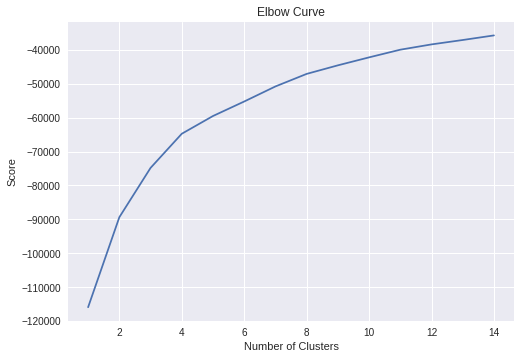

In [48]:
# Create K Clusters of 15
k = range(1,15)

# Instantiate and Fit KMeans of Clusters 1-15
kmeans = [KMeans(n_clusters=i) for i in k]
score = [kmeans[i].fit(df_pca).score(df_pca) for i in range(len(kmeans))]

# Plot the Elbow Method
pl.plot(k,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

**It is not so clear from the elbow curve, let us check the average Silhouette Scores**

## Silhouette Score

### The main goal of clustering is to minimise the intra cluster distance or make the points inside a cluster as dense as possible and intercluster distance or the distance between any two clusters as maximum as possible

### Silhouette analysis can be used to study the separation distance between the resulting clusters. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually. This measure has a range of [-1, 1].

### Silhouette coefficients (as these values are referred to as) near +1 indicate that the sample is far away from the neighboring clusters. A value of 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters and negative values indicate that those samples might have been assigned to the wrong cluster.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.4552974848861243
For n_clusters = 3 The average silhouette_score is : 0.4360205646798433
For n_clusters = 4 The average silhouette_score is : 0.4462519515674172
For n_clusters = 5 The average silhouette_score is : 0.39575367914797144
For n_clusters = 6 The average silhouette_score is : 0.38810914832006244
For n_clusters = 7 The average silhouette_score is : 0.33375342067170327


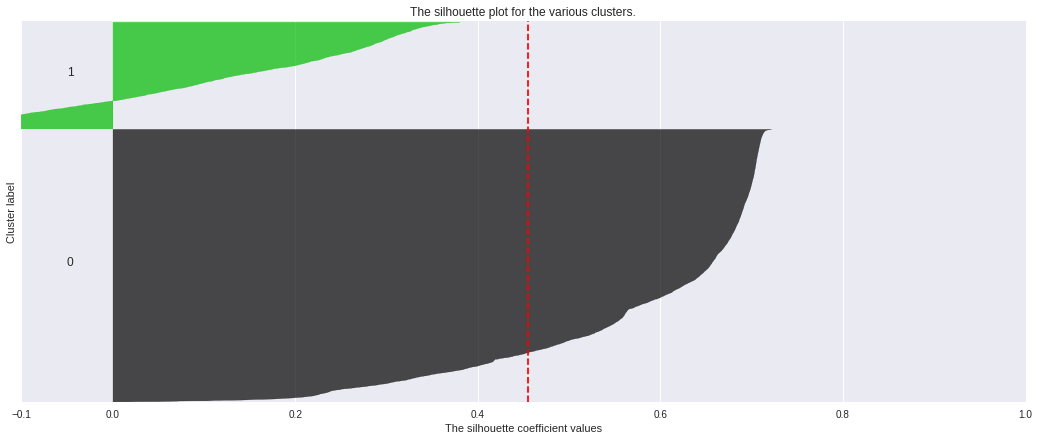

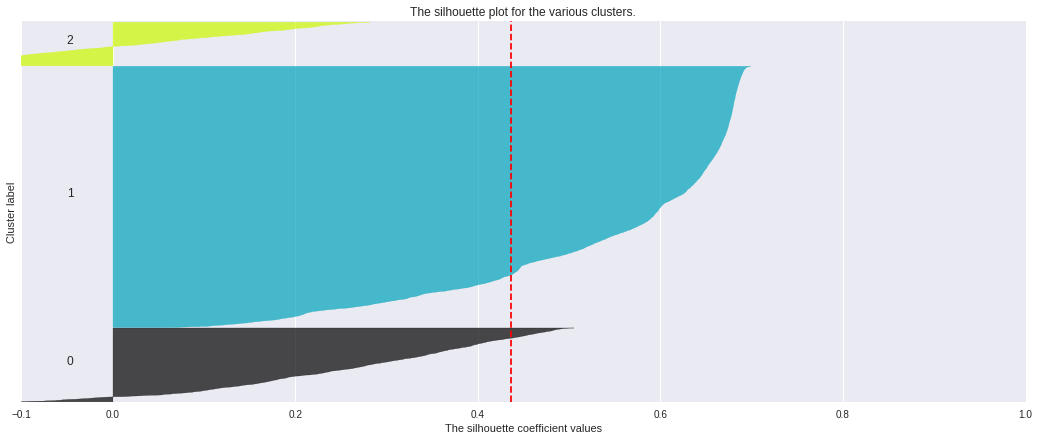

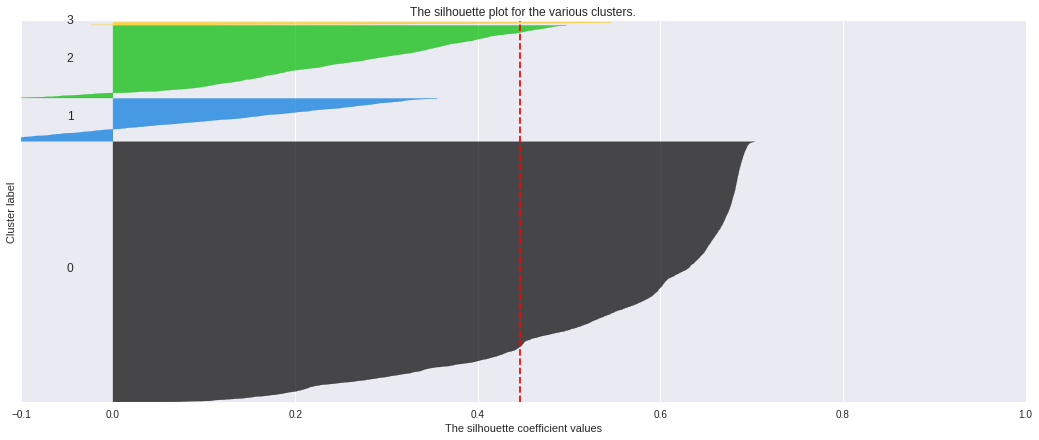

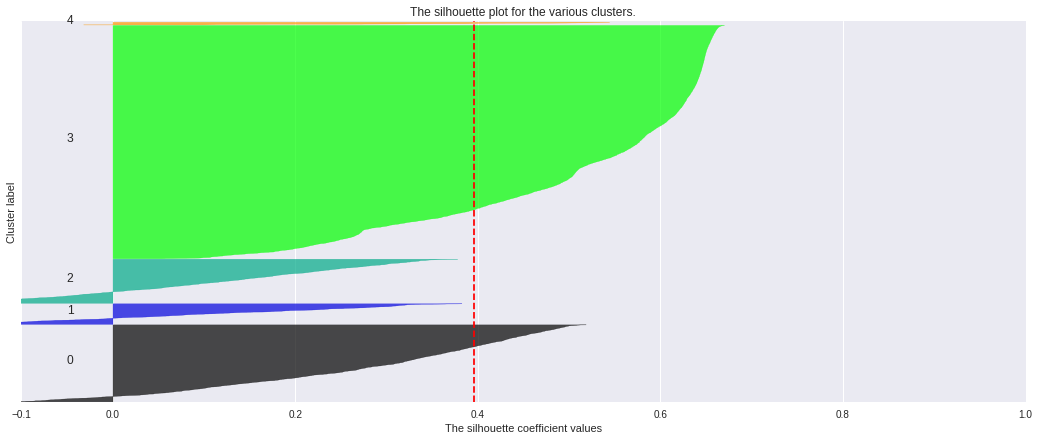

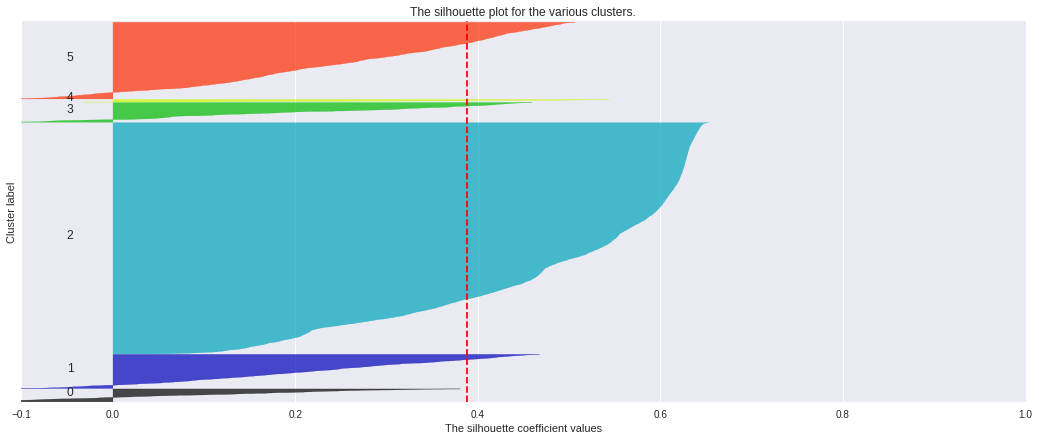

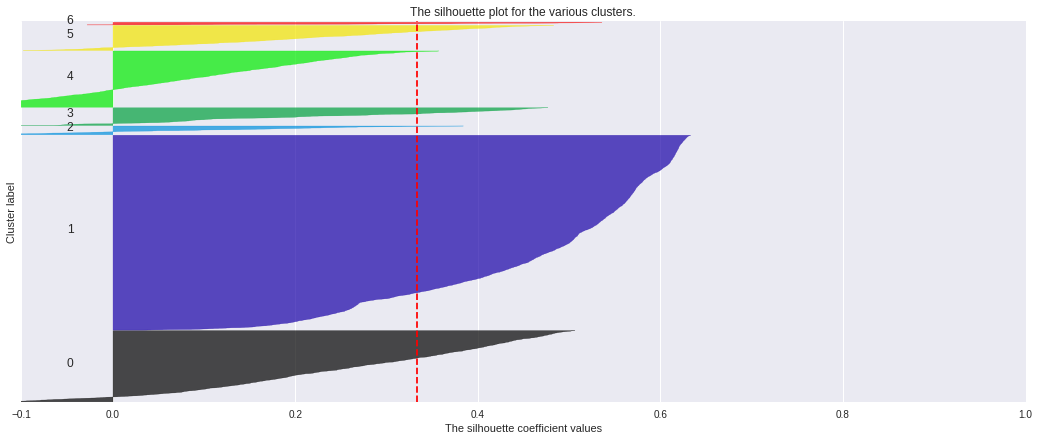

In [49]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.


range_n_clusters = [2, 3, 4, 5, 6,7]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_clean) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_clean)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_clean, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_clean, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()

**We see that clusters 2 and 4 have the best Silhouette scores of around 0.45, let us chose cluster size as 4 because we will get more segments and we can target them better. In the real world Scenario, the number of clusters depends totally on the domain we are dealing with and the Business Objective of the company**

In [0]:
# Choose Cluster Size of 3
cluster = KMeans(n_clusters = 4) 

df_clean['cluster'] = cluster.fit_predict(df_pca)

In [51]:
#Let us see the samples
df_clean.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [52]:
#Let us see how many entries are there in each cluster
df_clean['cluster'].value_counts().sort_index()

0    3406
1    1210
2    2126
3    1313
Name: cluster, dtype: int64

**we see that the cluster 1 has the highest records with 3406 and cluster 1 with 1210 entries**

## Cluster Centroids

In [54]:
# centers = np.array(kmeans_model.cluster_centers_)
pd.DataFrame(data = cluster.cluster_centers_ , columns= ['PC1', 'PC2','PC3', 'PC4','PC5', 'PC6','PC7','PC8'] )

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.020891,-0.946809,0.570970,0.212233,0.076916,-0.043158,0.135124,-0.092590
1,-3.144079,1.590373,1.191085,0.112592,-0.423983,0.048169,-0.039383,0.120625
2,-1.492746,-0.769038,-1.303861,-0.138100,0.106170,0.011953,-0.143068,0.002838
3,2.668142,2.235551,-0.466150,-0.430428,0.019266,0.048168,-0.082359,0.124352


In [69]:
df_clean[df_clean['cluster']==0].mean()

BALANCE                              864.441743
BALANCE_FREQUENCY                      0.780236
PURCHASES                            230.595211
ONEOFF_PURCHASES                     180.418097
INSTALLMENTS_PURCHASES                50.321970
CASH_ADVANCE                         417.336844
PURCHASES_FREQUENCY                    0.182059
ONEOFF_PURCHASES_FREQUENCY             0.096404
PURCHASES_INSTALLMENTS_FREQUENCY       0.083846
CASH_ADVANCE_FREQUENCY                 0.090498
CASH_ADVANCE_TRX                       1.558133
PURCHASES_TRX                          2.982090
CREDIT_LIMIT                        3092.762121
PAYMENTS                             767.839433
MINIMUM_PAYMENTS                     519.322287
PRC_FULL_PAYMENT                       0.072217
TENURE                                11.476218
cluster                                0.000000
dtype: float64

## Cluster 0 Characteristics
**The cluster 0 people  have the purchase frequency of 18%, their balance is also quite low which is 864 dollars. They spend very less on installment purchases of about 50 dollars. Their purchase is also quite low of about 230 dollars. They dont borrow much cash from the card either, with just 9% frequency. They are probably fairly new customers who have a low balance and cash advance. The credit card provider might encourage them to increase their activity by offering cash backs, promotions, free Uber rides etc**

In [70]:
df_clean[df_clean['cluster']==1].mean()

BALANCE                             1307.714292
BALANCE_FREQUENCY                      0.969304
PURCHASES                           2046.647380
ONEOFF_PURCHASES                    1449.238702
INSTALLMENTS_PURCHASES               597.449174
CASH_ADVANCE                         209.247750
PURCHASES_FREQUENCY                    0.865467
ONEOFF_PURCHASES_FREQUENCY             0.659424
PURCHASES_INSTALLMENTS_FREQUENCY       0.510869
CASH_ADVANCE_FREQUENCY                 0.042692
CASH_ADVANCE_TRX                       0.776860
PURCHASES_TRX                         30.733884
CREDIT_LIMIT                        5805.751315
PAYMENTS                            1988.937350
MINIMUM_PAYMENTS                     523.839005
PRC_FULL_PAYMENT                       0.231732
TENURE                                11.904959
cluster                                1.000000
dtype: float64

## Cluster 1 Characteristics
**The cluster 1 people have a very good credit limit on an average of about 5800 dollars. They have a high purchase frequency of 86.5%. They have fairly high full payment percentage of 23%. They have less cash advance frequency of just 4% and the average cash advance amount is 200 dollars. The average payment made is around 1988dollars. These indicates this cluster belongs to people who are frequent credit card users with high transactions, the credit card company can target them to increase their spending by giving more attractive offers and by increasing their credit limit to encourage them to spend more.**

In [71]:
df_clean[df_clean['cluster']==2].mean()

BALANCE                              592.984174
BALANCE_FREQUENCY                      0.900413
PURCHASES                            742.647286
ONEOFF_PURCHASES                      95.858537
INSTALLMENTS_PURCHASES               647.456943
CASH_ADVANCE                         157.697299
PURCHASES_FREQUENCY                    0.866308
ONEOFF_PURCHASES_FREQUENCY             0.064034
PURCHASES_INSTALLMENTS_FREQUENCY       0.812392
CASH_ADVANCE_FREQUENCY                 0.033621
CASH_ADVANCE_TRX                       0.622766
PURCHASES_TRX                         16.529163
CREDIT_LIMIT                        3209.850029
PAYMENTS                             889.552907
MINIMUM_PAYMENTS                     641.460119
PRC_FULL_PAYMENT                       0.288365
TENURE                                11.445908
cluster                                2.000000
dtype: float64

## Cluster 2 Characteristics
**The cluster 2 people have very less cash advance among the clusters that is on an average of 157dollars. Their purchase frequency is high with about 86.6%. They take the cash advance very less frequently of about just 3.3%, they have very good full payment percentage rate of about 28.8%. These people are called transactors because they pay very less in interest.**

In [72]:
df_clean[df_clean['cluster']==3].mean()

BALANCE                             3380.880304
BALANCE_FREQUENCY                      0.952370
PURCHASES                            184.058378
ONEOFF_PURCHASES                     122.608751
INSTALLMENTS_PURCHASES                61.492826
CASH_ADVANCE                        2976.624321
PURCHASES_FREQUENCY                    0.154328
ONEOFF_PURCHASES_FREQUENCY             0.067987
PURCHASES_INSTALLMENTS_FREQUENCY       0.089614
CASH_ADVANCE_FREQUENCY                 0.395214
CASH_ADVANCE_TRX                       9.799695
PURCHASES_TRX                          2.954303
CREDIT_LIMIT                        5900.320801
PAYMENTS                            2330.921739
MINIMUM_PAYMENTS                    1559.221438
PRC_FULL_PAYMENT                       0.031114
TENURE                                11.511043
cluster                                3.000000
dtype: float64

## Cluster 3 characteristics
**These are the customers with very high credit limit of about 5900 dollars on an average. They have high credit advance frequency of 39 percent and the lowest full payment of about 3.1%. They also have the least purchase frequency among the clusters with 15.4 percent. Also they have the highest balance of about 3380 dollars. These are the people who are called as revolvers who might be using their credit card’s as a loan.**

**We were able to successfully segment the customers into clusters and this gives the credit card company a better way to target the customers than targeting them the same way. In this manner, the credit card company can make more business by getting their customers to use more.**

**Thank you for the read.**